<a href="https://colab.research.google.com/github/hardik0/Deep-Learning-with-GoogleColab/blob/master/ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.

In [0]:
from google.colab import drive
drive.mount('/content/drive')



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


In [0]:
import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [0]:
!nvidia-smi

#◢ Git clone and install DeOldify

In [0]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1921 (delta 5), reused 15 (delta 3), pack-reused 1898
Receiving objects: 100% (1921/1921), 69.28 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (828/828), done.


In [0]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [0]:
!pip install -r requirements.txt

In [0]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [0]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

In [0]:
colorizer = get_image_colorizer(artistic=True)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.

#◢ Colorize!!

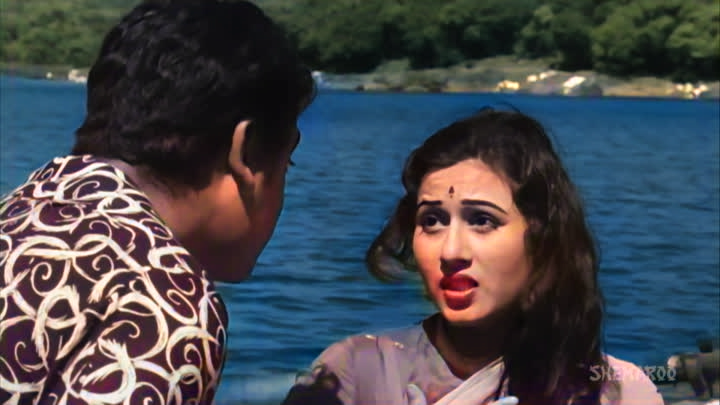

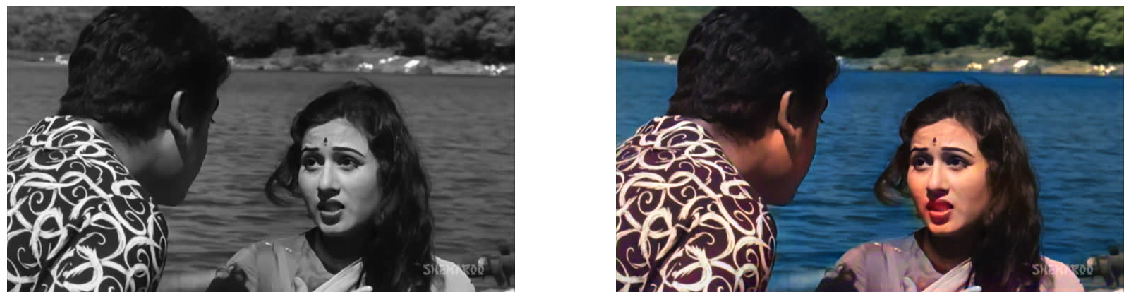

In [0]:
source_url = 'https://vdp.mycdn.me/getImage?id=304228928101&idx=7&thumbType=32' #@param {type:"string"}
render_factor = 13  #@param {type: "slider", min: 7, max: 45}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

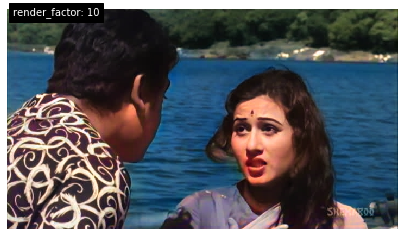

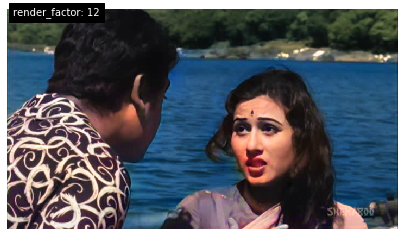

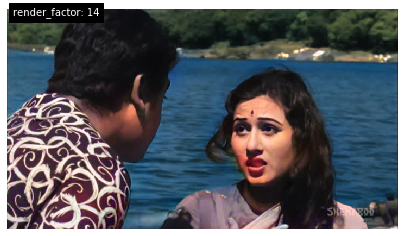

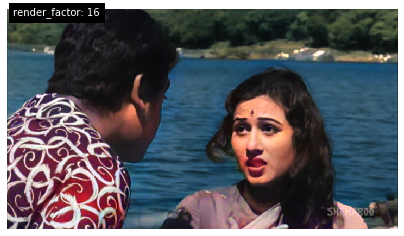

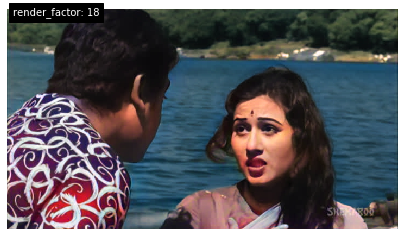

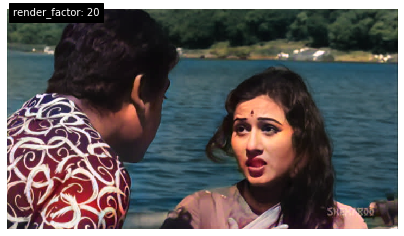

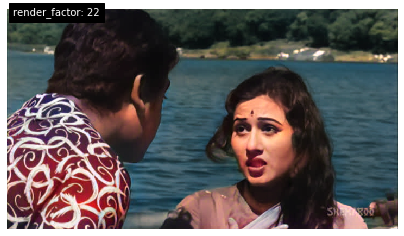

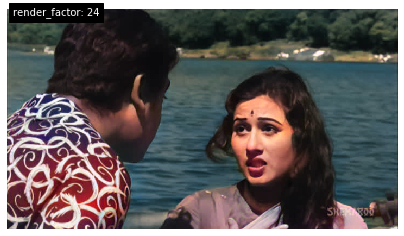

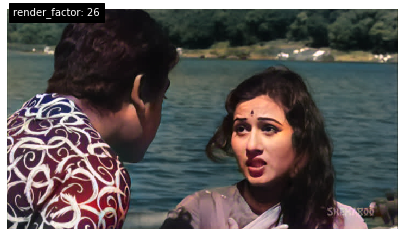

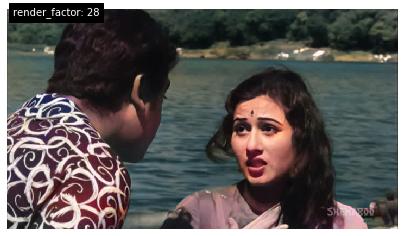

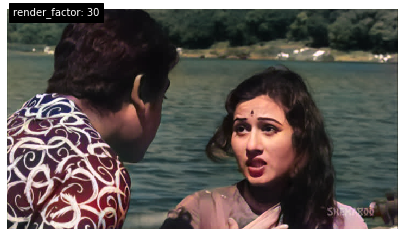

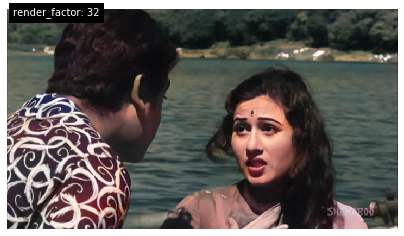

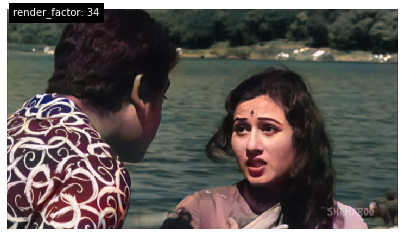

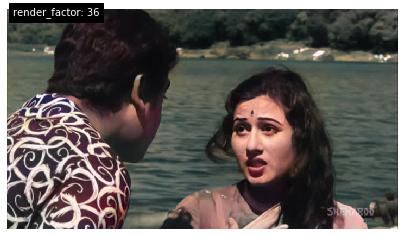

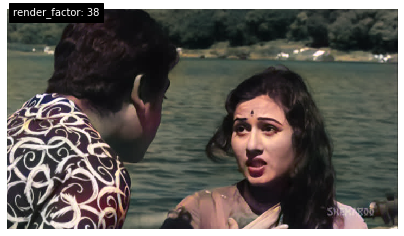

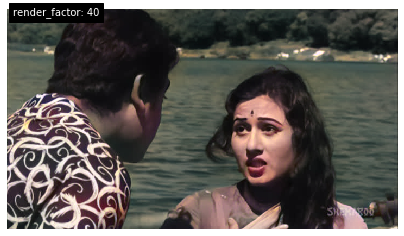

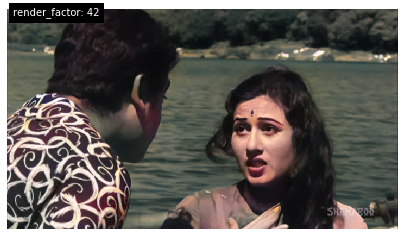

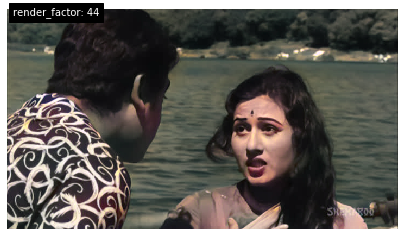

In [0]:
for i in range(10,46,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(7,7))

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)